In [4]:
import sys
import numpy as np
import time
from matplotlib import pyplot as plt

In [41]:
def GenerateDataset():
    num_points = 1000
    points = np.random.random_sample(num_points * 2)
    points.shape = (num_points, 2)
    difference = 0.52
    for i in range(num_points):
        if np.random.randint(0, 2):
            points[i][0] -= difference
        else:
            points[i][0] += difference
        if np.random.randint(0, 2):
            points[i][1] -= difference
        else:
            points[i][1] += difference
        # if np.random.randint(0, 2):
        #     points[i][0] *= -1
        # if np.random.randint(0, 2):
        #     points[i][1] *= -1
    # print(points)
    PlotPoints(points)
    np.save("data", points)

In [29]:
def EuclideanDistance(point_x, point_y):
    s = 0
    #  The sum of the squared differences of the elements
    for i in range(len(point_x)):
        s += ((point_x[i] - point_y[i]) ** 2)
    return s ** 0.5
    # The square root of the sum

In [30]:
def Classify(means, item): 
    # Classify item to the mean with minimum distance
    minimum = sys.maxsize
    index = -1;
    for i in range(len(means)):
        # Find distance from item to mean
        dis = EuclideanDistance(item, means[i])
        if (dis < minimum):
            minimum = dis
            index = i
    return index; 

In [31]:
def UpdateMean(means, items_cluster):
    dimensions = len(means[0])
    for i in range(len(means)):
        sum = [0 for _ in range(dimensions)]
        size = len(items_cluster[i])
        for j in range(size):
            for k in range(dimensions):
                sum[k] += items_cluster[i][j][k]
        if (size != 0):
            for k in range(dimensions):
                sum[k] = sum[k] / size
                means[i][k] = sum[k]

In [32]:
def PlotPoints(points):
    for point in points:
        plt.plot(point[0], point[1], 'ko')
    plt.show()

In [33]:
def PlotClusters(items_cluster, means):
    colors = {0: 'ro', 1: 'bo', 2: 'go', 3: 'yo', 4: 'ko', 5: 'co', 6: 'mo'}
    for i in items_cluster.keys():
        for point in items_cluster[i]:
            plt.plot(point[0], point[1], colors[i])
    for point in means:
        plt.plot(point[0], point[1], 'co')
    plt.show()

In [42]:
import time 
def KMeans():
    points = np.load("data.npy")
    k = int(input("Enter Number of Clusters: "))
    means = [np.random.random_sample(2) for i in range(k)]
    iterations = 5
    for _ in range(iterations):
#         start_time = time.time()
        items_cluster = {i: [] for i in range(k)}
        for item in points:
            items_cluster[Classify(means, item)].append(item)
            UpdateMean(means, items_cluster)
#         print(_, means, time.time() - start_time)
    PlotClusters(items_cluster, means)

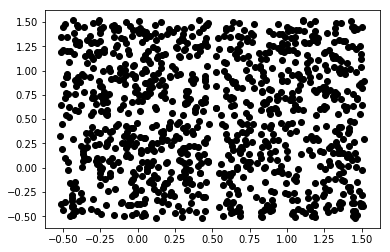

In [43]:
GenerateDataset()

Enter Number of Clusters: 6


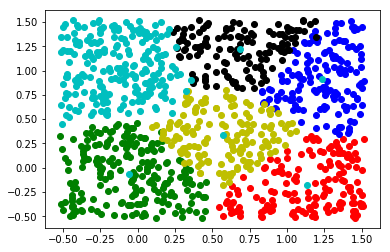

In [45]:
KMeans()

Enter Number of Clusters: 4


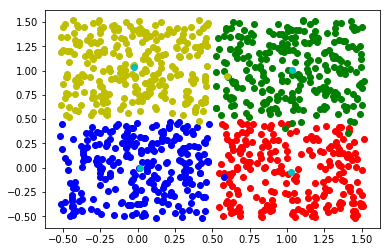

In [46]:
KMeans()